**正常讀取檔案，尚未添加功能**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
影像數量: 5
硬幣計數結果已輸出到 /content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識/out.txt


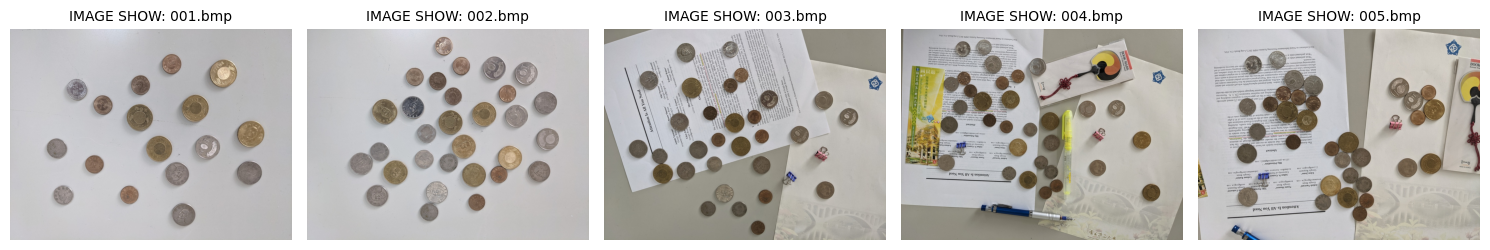

目前所在資料夾: /content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識
輸出檔案 /content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識/out.txt 已保存成功！


In [ ]:
import cv2
import os
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')

# 定義輸入與輸出檔案
input_file = "/content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識/finalproject_in.txt"  # 輸入檔案名稱
image_folder = "/content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識"
output_file = "/content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識/out.txt"  # 輸出檔案名稱

# 初始化影像路徑列表
image_paths = []

# 讀取 in.txt，解析影像路徑
with open(input_file, 'r') as file:
    for line in file:
        parts = line.strip()
        image_paths.append(os.path.join(image_folder, parts))  # 將路徑與檔名結合

# 確認影像數量
num_images = len(image_paths)
print(f"影像數量: {num_images}")

# 假設這是處理後的硬幣計數結果 (硬幣檢測邏輯的輸出結果)
# 每個子清單代表一張影像的硬幣數量：[1元, 5元, 10元, 50元]
results = [
    [0, 1, 2, 1],  # 第一張影像的硬幣數量
    [1, 1, 3, 0],  # 第二張影像的硬幣數量
    [1, 1, 1, 2],  # 第三張影像的硬幣數量
    [1, 2, 3, 1],  # 第四張影像的硬幣數量
    [1, 0, 1, 1]   # 第五張影像的硬幣數量
]

# 寫入結果到 out.txt
with open(output_file, "w") as file:
    # 輸出影像數量
    file.write(f"{num_images}\n")
    # 輸出每張影像的硬幣數量
    for result in results:
        file.write(" ".join(map(str, result)) + "\n")

print(f"硬幣計數結果已輸出到 {output_file}")

# 顯示影像在同一行列上
if num_images > 0:
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))  # 動態生成子圖
    for idx, (image_path, ax) in enumerate(zip(image_paths, axes)):
        # 讀取影像
        image = cv2.imread(image_path)

        if image is not None:
            # 變更顏色程式，使 OpenCV RGB 模式變成 matplotlib RGB 模式
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # 顯示影像
            ax.imshow(image)
            ax.axis('off')  # 不顯示座標
            ax.set_title(f"IMAGE SHOW: {os.path.basename(image_path)}", fontsize=10)
        else:
            ax.axis('off')
            ax.set_title(f"無法讀取影像", fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("沒有影像可供顯示")

# 切換到影像資料夾所在路徑
os.chdir(image_folder)
print(f"目前所在資料夾: {os.getcwd()}")

# 檢查輸出檔案是否存在
if os.path.exists(output_file):
    print(f"輸出檔案 {output_file} 已保存成功！")
else:
    print(f"輸出檔案 {output_file} 保存失敗")


***測試檢測硬幣的效果***

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

# 定義輸入與輸出檔案
input_file = "/content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識/finalproject_in20.txt"  # 輸入檔案名稱
image_folder = "/content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識"
output_file = "/content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識/out.txt"  # 輸出檔案名稱

# 初始化影像路徑列表
image_paths = []

# 讀取 in.txt，解析影像路徑，檢查檔案是否存在
with open(input_file, 'r') as file:
    for line in file:
        parts = line.strip()
        image_path = os.path.join(image_folder, parts)  # 將路徑與檔名結合
        if os.path.exists(image_path):
            image_paths.append(image_path)
        else:
            print(f"找不到對應檔案，準備忽略 {image_path}，已跳過。")

# 確認有效影像數量
num_images = len(image_paths)
print(f"有效影像數量: {num_images}")

# 初始化儲存結果
all_results = []
output_images = []

# 處理每張影像
for image_path in image_paths:
    in_image = cv2.imread(image_path)
    if in_image is None:
        print(f"錯誤：無法載入影像 {image_path}")
        continue

    # 轉換為灰階並應用高斯模糊 (降噪處理)
    gray_image = cv2.cvtColor(in_image, cv2.COLOR_BGR2GRAY)

    # 應用自適應直方圖均衡化 (CLAHE) 增強對比度
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_gray = clahe.apply(gray_image)

    # 調整亮度和對比度
    alpha = 1.5  # 對比度調整係數
    beta = 20    # 亮度調整值
    adjusted_gray = cv2.convertScaleAbs(enhanced_gray, alpha=alpha, beta=beta)

    # 應用高斯模糊 (降噪處理)
    blurred = cv2.GaussianBlur(adjusted_gray, (9, 9), 2)

    # 使用霍夫圓檢測
    circles = cv2.HoughCircles(
        blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=35,
        param1=100, param2=30, minRadius=20, maxRadius=70
    )

    # 儲存結果的列表
    output = in_image.copy()
    coin_areas = []

    if circles is not None:
        circles = np.uint16(np.around(circles))
        radii = []
        for idx, i in enumerate(circles[0, :]):
            x, y, radius = i
            radii.append(radius)
            coin_area_data = {"x": x, "y": y, "radius": radius}
            coin_areas.append(coin_area_data)

        # 根據半徑排序並分四等分
        radii.sort()
        n = len(radii) // 4
        thresholds = [radii[n - 1], radii[2 * n - 1], radii[3 * n - 1]]

        # 計算最大四等分的平均值
        max_avg = sum(radii[3 * n:]) / len(radii[3 * n:])

        # 過濾掉超過 20% 的圓
        filtered_coin_areas = []
        for coin in coin_areas:
            if coin["radius"] <= max_avg * 1.2:
                filtered_coin_areas.append(coin)

        # 更新硬幣類型
        counts = [0, 0, 0, 0]  # 初始化硬幣計數 [1元, 5元, 10元, 50元]
        for idx, coin in enumerate(filtered_coin_areas):
            radius = coin["radius"]
            if radius <= thresholds[0]:
                coin["type"] = "1"
                counts[0] += 1
            elif radius <= thresholds[1]:
                coin["type"] = "5"
                counts[1] += 1
            elif radius <= thresholds[2]:
                coin["type"] = "10"
                counts[2] += 1
            else:
                coin["type"] = "50"
                counts[3] += 1

            # 在輸出影像上繪製並標記硬幣
            x, y = coin["x"], coin["y"]
            cv2.circle(output, (x, y), radius, (0, 255, 0), 2)  # 繪製綠色圓圈
            cv2.putText(output, f"${coin['type']}", (x - 40, y),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 0), 2)  # 標記硬幣編號與類型

        # 儲存結果
        all_results.append(counts)
        output_images.append(output)

# 將結果寫入 out.txt
with open(output_file, "w") as file:
    file.write(f"{num_images}\n")
    for result in all_results:
        file.write(" ".join(map(str, result)) + "\n")

# 列印結果供檢查
print("檢測結果預覽：")
for idx, result in enumerate(all_results):
    print(f"影像 {idx + 1}: 1元={result[0]}個, 5元={result[1]}個, 10元={result[2]}個, 50元={result[3]}個")

# 單獨展示輸入影像和辨識後的影像
for idx, (image_path, output_image) in enumerate(zip(image_paths, output_images)):
    # 顯示輸入影像
    input_image = cv2.imread(image_path)
    if input_image is not None:
        input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(input_image)
        plt.axis('off')
        plt.title(f"Input {idx + 1}")

    # 顯示辨識後影像
    output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 2, 2)
    plt.imshow(output_image)
    plt.axis('off')
    plt.title(f"Output {idx + 1}")

    plt.show()

# 檢查輸出檔案是否存在
if os.path.exists(output_file):
    print(f"輸出檔案 {output_file} 已保存成功！")
else:
    print(f"輸出檔案 {output_file} 保存失敗")


Output hidden; open in https://colab.research.google.com to view.

**主程式**

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

# 定義輸入與輸出檔案
input_file = "/content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識/finalproject_in20.txt"  # 輸入檔案名稱
image_folder = "/content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識"
output_file = "/content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識/out.txt"  # 輸出檔案名稱

# 初始化影像路徑列表
image_paths = []

# 讀取 in.txt，解析影像路徑，檢查檔案是否存在
with open(input_file, 'r') as file:
    for line in file:
        parts = line.strip()
        image_path = os.path.join(image_folder, parts)  # 將路徑與檔名結合
        if os.path.exists(image_path):
            image_paths.append(image_path)
        else:
            print(f"找不到對應檔案，準備忽略 {image_path}，已跳過。")

# 確認有效影像數量
num_images = len(image_paths)
print(f"有效影像數量: {num_images}")

# 初始化儲存結果
all_results = []
output_images = []

# 處理每張影像
for image_path in image_paths:
    in_image = cv2.imread(image_path)
    if in_image is None:
        print(f"錯誤：無法載入影像 {image_path}")
        continue

    # 轉換為灰階並應用高斯模糊 (降噪處理)
    gray_image = cv2.cvtColor(in_image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray_image, (9, 9), 2)

    # 使用霍夫圓檢測
    circles = cv2.HoughCircles(
        blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=35,
        param1=100, param2=30, minRadius=20, maxRadius=70
    )

    # 儲存結果的列表
    output = in_image.copy()
    coin_areas = []

    if circles is not None:
        circles = np.uint16(np.around(circles))
        radii = []
        for idx, i in enumerate(circles[0, :]):
            x, y, radius = i
            radii.append(radius)
            coin_area_data = {"x": x, "y": y, "radius": radius}
            coin_areas.append(coin_area_data)

        # 根據半徑排序並分四等分
        radii.sort()
        n = len(radii) // 4
        thresholds = [radii[n - 1], radii[2 * n - 1], radii[3 * n - 1]]

        # 計算最大四等分的平均值
        max_avg = sum(radii[3 * n:]) / len(radii[3 * n:])

        # 過濾掉超過 20% 的圓
        filtered_coin_areas = []
        for coin in coin_areas:
            if coin["radius"] <= max_avg * 1.2:
                filtered_coin_areas.append(coin)

        # 更新硬幣類型
        counts = [0, 0, 0, 0]  # 初始化硬幣計數 [1元, 5元, 10元, 50元]
        for idx, coin in enumerate(filtered_coin_areas):
            radius = coin["radius"]
            if radius <= thresholds[0]:
                coin["type"] = "1"
                counts[0] += 1
            elif radius <= thresholds[1]:
                coin["type"] = "5"
                counts[1] += 1
            elif radius <= thresholds[2]:
                coin["type"] = "10"
                counts[2] += 1
            else:
                coin["type"] = "50"
                counts[3] += 1

            # 在輸出影像上繪製並標記硬幣
            x, y = coin["x"], coin["y"]
            cv2.circle(output, (x, y), radius, (0, 255, 0), 2)  # 繪製綠色圓圈
            cv2.putText(output, f"${coin['type']}", (x - 40, y),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 0), 2)  # 標記硬幣編號與類型

        # 儲存結果
        all_results.append(counts)
        output_images.append(output)

# 將結果寫入 out.txt
with open(output_file, "w") as file:
    file.write(f"{num_images}\n")
    for result in all_results:
        file.write(" ".join(map(str, result)) + "\n")

# 列印結果供檢查
print("檢測結果預覽：")
for idx, result in enumerate(all_results):
    print(f"影像 {idx + 1}: 1元={result[0]}個, 5元={result[1]}個, 10元={result[2]}個, 50元={result[3]}個")

# 單獨展示輸入影像和辨識後的影像
for idx, (image_path, output_image) in enumerate(zip(image_paths, output_images)):
    # 顯示輸入影像
    input_image = cv2.imread(image_path)
    if input_image is not None:
        input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(input_image)
        plt.axis('off')
        plt.title(f"Input {idx + 1}")

    # 顯示辨識後影像
    output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 2, 2)
    plt.imshow(output_image)
    plt.axis('off')
    plt.title(f"Output {idx + 1}")

    plt.show()

# 檢查輸出檔案是否存在
if os.path.exists(output_file):
    print(f"輸出檔案 {output_file} 已保存成功！")
else:
    print(f"輸出檔案 {output_file} 保存失敗")


Output hidden; open in https://colab.research.google.com to view.

**使用這份來考試**

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

# 定義輸入與輸出檔案
input_file = "/content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識/finalproject_in20.txt"  # 輸入檔案名稱
image_folder = "/content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識"
output_file = "/content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識/out.txt"  # 輸出檔案名稱

# 初始化影像路徑列表
image_paths = []

# 讀取 in.txt，解析影像路徑，檢查檔案是否存在
with open(input_file, 'r') as file:
    for line in file:
        parts = line.strip()
        image_path = os.path.join(image_folder, parts)  # 將路徑與檔名結合
        if os.path.exists(image_path):
            image_paths.append(image_path)
        else:
            print(f"警告: 找不到影像文件 {image_path}，已跳過。")

# 確認有效影像數量
num_images = len(image_paths)
print(f"有效影像數量: {num_images}")

# 初始化儲存結果
all_results = []
output_images = []

# 處理每張影像
for image_path in image_paths:
    in_image = cv2.imread(image_path)
    if in_image is None:
        print(f"錯誤：無法載入影像 {image_path}")
        continue

    # 轉換為灰階並應用高斯模糊 (降噪處理)
    gray_image = cv2.cvtColor(in_image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray_image, (9, 9), 2)

    # 使用霍夫圓檢測
    circles = cv2.HoughCircles(
        blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=35,
        param1=100, param2=30, minRadius=20, maxRadius=70
    )

    # 儲存結果的列表
    output = in_image.copy()
    coin_areas = []

    if circles is not None:
        circles = np.uint16(np.around(circles))
        radii = []
        for idx, i in enumerate(circles[0, :]):
            x, y, radius = i
            radii.append(radius)
            coin_area_data = {"x": x, "y": y, "radius": radius}
            coin_areas.append(coin_area_data)

        # 根據半徑排序並分四等分
        radii.sort()
        n = len(radii) // 4
        thresholds = [radii[n - 1], radii[2 * n - 1], radii[3 * n - 1]]

        # 更新硬幣類型
        counts = [0, 0, 0, 0]  # 初始化硬幣計數 [1元, 5元, 10元, 50元]
        for idx, coin in enumerate(coin_areas):
            radius = coin["radius"]
            if radius <= thresholds[0]:
                coin["type"] = "1"
                counts[0] += 1
            elif radius <= thresholds[1]:
                coin["type"] = "5"
                counts[1] += 1
            elif radius <= thresholds[2]:
                coin["type"] = "10"
                counts[2] += 1
            else:
                coin["type"] = "50"
                counts[3] += 1

            # 在輸出影像上繪製並標記硬幣
            x, y = coin["x"], coin["y"]
            cv2.circle(output, (x, y), radius, (0, 255, 0), 2)  # 繪製綠色圓圈
            cv2.putText(output, f"${coin['type']}", (x - 40, y),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 0), 2)  # 標記硬幣編號與類型

        # 儲存結果
        all_results.append(counts)
        output_images.append(output)

# 將結果寫入 out.txt
with open(output_file, "w") as file:
    file.write(f"{num_images}\n")
    for result in all_results:
        file.write(" ".join(map(str, result)) + "\n")

# 列印結果供檢查
print("檢測結果預覽：")
for idx, result in enumerate(all_results):
    print(f"影像 {idx + 1}: 1元={result[0]}個, 5元={result[1]}個, 10元={result[2]}個, 50元={result[3]}個")

# 單獨展示輸入影像和辨識後的影像
for idx, (image_path, output_image) in enumerate(zip(image_paths, output_images)):
    # 顯示輸入影像
    input_image = cv2.imread(image_path)
    if input_image is not None:
        input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(input_image)
        plt.axis('off')
        plt.title(f"Input {idx + 1}")

    # 顯示辨識後影像
    output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 2, 2)
    plt.imshow(output_image)
    plt.axis('off')
    plt.title(f"Output {idx + 1}")

    plt.show()

# 檢查輸出檔案是否存在
if os.path.exists(output_file):
    print(f"輸出檔案 {output_file} 已保存成功！")
else:
    print(f"輸出檔案 {output_file} 保存失敗")


Output hidden; open in https://colab.research.google.com to view.

**準確率比較**

In [ ]:
import numpy as np

# 定義輸出與真實值檔案
out_file = "/content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識/out.txt"
gt_file = "/content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識/finalproject_gt.txt"

# 讀取文件內容
def read_file(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()
        data = [list(map(int, line.strip().split())) for line in lines[1:]]  # 跳過第一行數量
    return data

# 計算準確率
def calculate_accuracy(out_data, gt_data):
    accuracies = []
    for out_row, gt_row in zip(out_data, gt_data):
        denominator = sum(gt_row)  # 真實值的總和
        numerator = sum(abs(o - g) for o, g in zip(out_row, gt_row))  # 差值的絕對值
        accuracy = 1.0 - (numerator / denominator)
        accuracies.append(accuracy)
    overall_accuracy = sum(accuracies) / len(accuracies)
    return overall_accuracy, accuracies

# 主程序
out_data = read_file(out_file)
gt_data = read_file(gt_file)

# 計算並顯示準確率
overall_accuracy, individual_accuracies = calculate_accuracy(out_data, gt_data)

# 比較輸入與答案並顯示準確率
print("詳細比較:")
for idx, (out_row, gt_row, accuracy) in enumerate(zip(out_data, gt_data, individual_accuracies)):
    out_str = " ".join(map(str, out_row))
    gt_str = " ".join(map(str, gt_row))
    print(f"影像 {idx + 1}:")
    print(f"輸入: {out_str}")
    print(f"答案: {gt_str}")
    print(f"準確率: {accuracy * 100:.2f}%\n")

print(f"總準確率: {overall_accuracy * 100:.2f}%")


詳細比較:
影像 1:
輸入: 5 3 4 5
答案: 5 3 4 5
準確率: 100.00%

影像 2:
輸入: 8 6 7 9
答案: 8 10 10 7
準確率: 74.29%

影像 3:
輸入: 10 6 10 5
答案: 8 5 12 4
準確率: 79.31%

影像 4:
輸入: 13 5 12 3
答案: 8 8 8 6
準確率: 50.00%

影像 5:
輸入: 10 6 11 6
答案: 10 8 7 7
準確率: 78.12%

影像 6:
輸入: 6 6 6 9
答案: 4 5 8 5
準確率: 59.09%

影像 7:
輸入: 7 6 5 8
答案: 4 5 8 8
準確率: 72.00%

影像 8:
輸入: 6 6 6 8
答案: 4 8 3 9
準確率: 66.67%

影像 9:
輸入: 7 7 10 4
答案: 0 8 12 7
準確率: 51.85%

影像 10:
輸入: 11 6 8 7
答案: 3 8 14 6
準確率: 45.16%

總準確率: 67.65%


**俊睿圖片版**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
找不到對應檔案，準備忽略 /content/drive/MyDrive/photo/020.jpg，已跳過。
有效影像數量: 19
檢測結果預覽：
影像 1: 1元=5個, 5元=3個, 10元=4個, 50元=5個
影像 2: 1元=7個, 5元=7個, 10元=9個, 50元=7個
影像 3: 1元=8個, 5元=8個, 10元=5個, 50元=9個
影像 4: 1元=11個, 5元=4個, 10元=8個, 50元=4個
影像 5: 1元=7個, 5元=7個, 10元=10個, 50元=7個
影像 6: 1元=5個, 5元=1個, 10元=3個, 50元=6個
影像 7: 1元=8個, 5元=4個, 10元=8個, 50元=4個
影像 8: 1元=4個, 5元=4個, 10元=4個, 50元=6個
影像 9: 1元=6個, 5元=7個, 10元=5個, 50元=9個
影像 10: 1元=10個, 5元=4個, 10元=9個, 50元=7個
影像 11: 1元=3個, 5元=1個, 10元=2個, 50元=2個
影像 12: 1元=2個, 5元=2個, 10元=2個, 50元=4個
影像 13: 1元=1個, 5元=0個, 10元=0個, 50元=0個
影像 14: 1元=5個, 5元=0個, 10元=0個, 50元=0個
影像 15: 1元=3個, 5元=0個, 10元=0個, 50元=0個
影像 16: 1元=3個, 5元=4個, 10元=3個, 50元=1個
影像 17: 1元=4個, 5元=0個, 10元=3個, 50元=2個
影像 18: 1元=2個, 5元=2個, 10元=2個, 50元=5個
影像 19: 1元=3個, 5元=1個, 10元=2個, 50元=3個


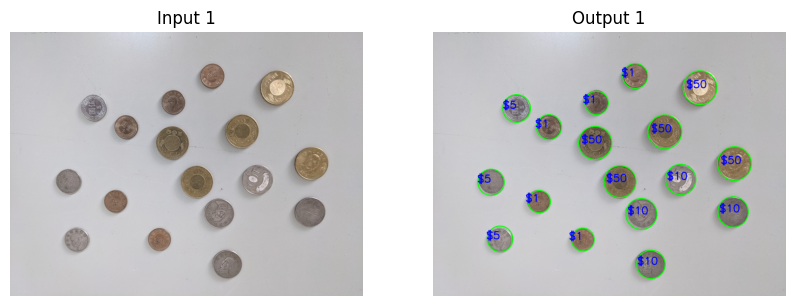

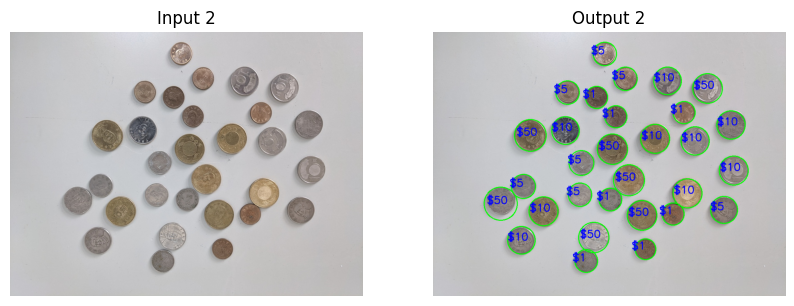

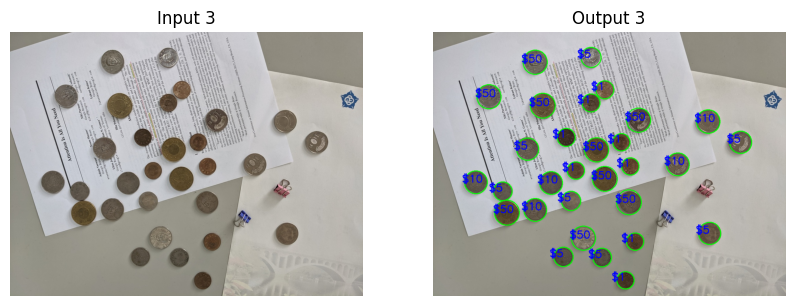

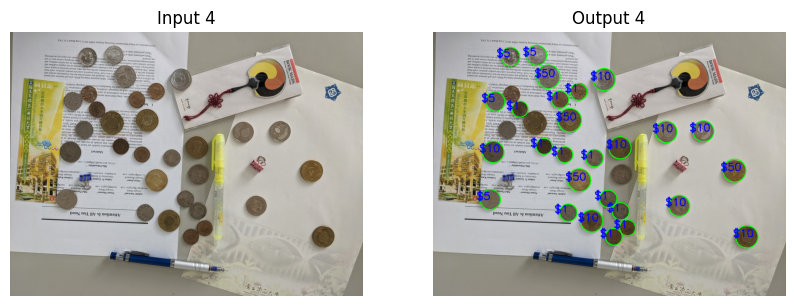

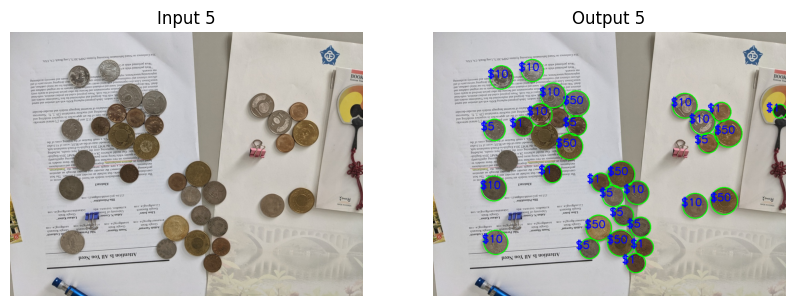

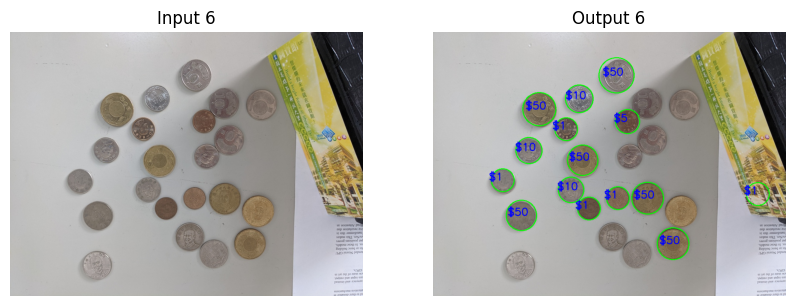

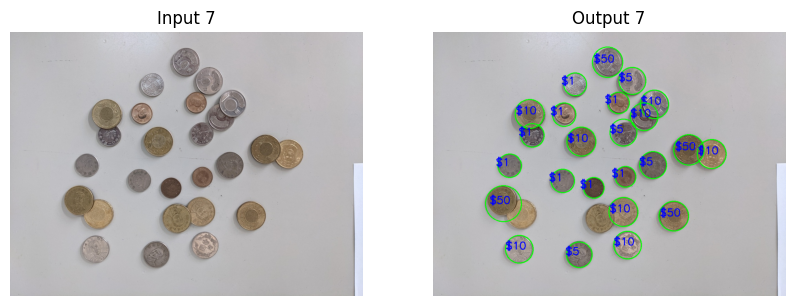

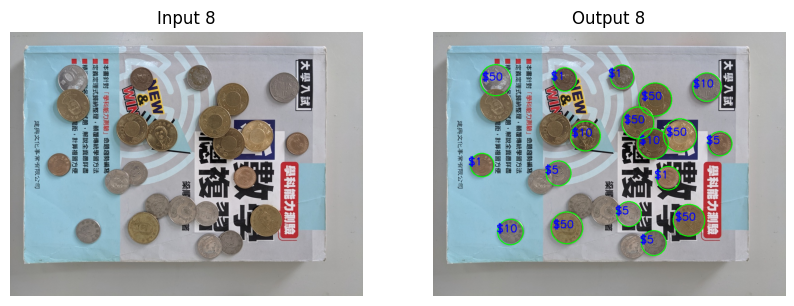

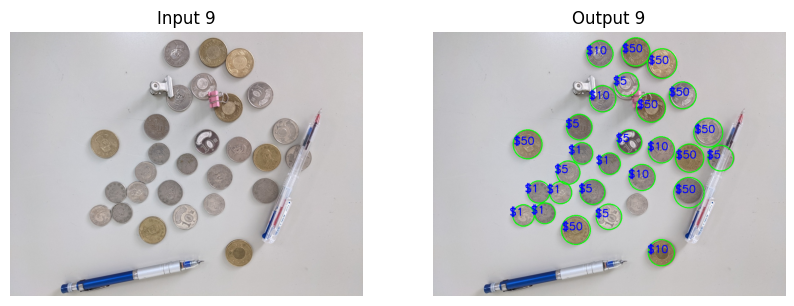

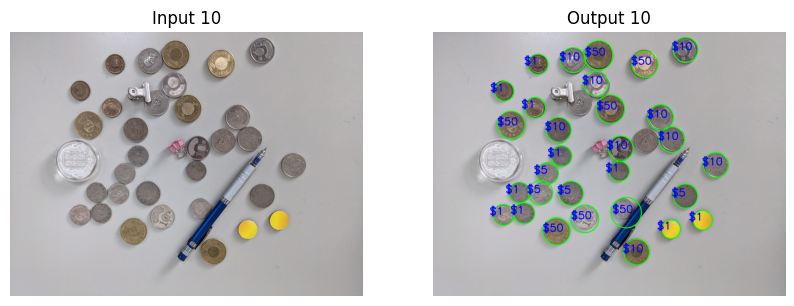

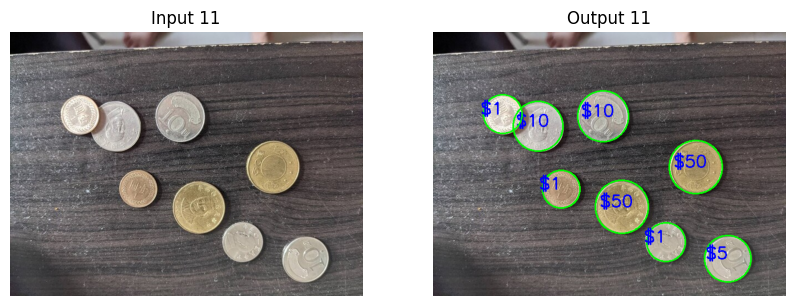

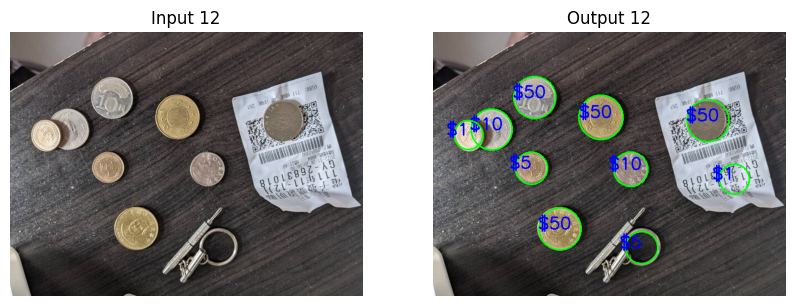

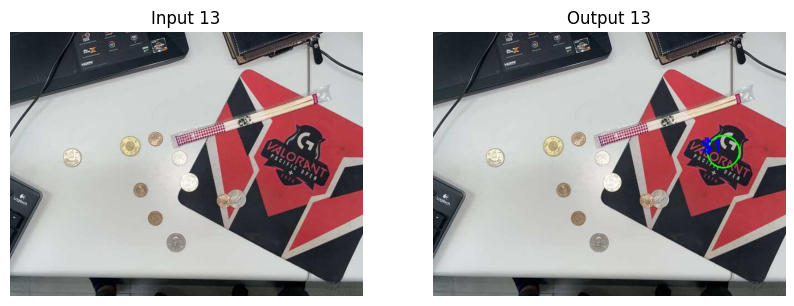

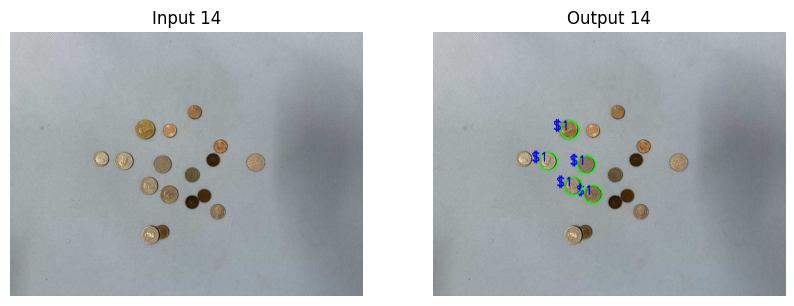

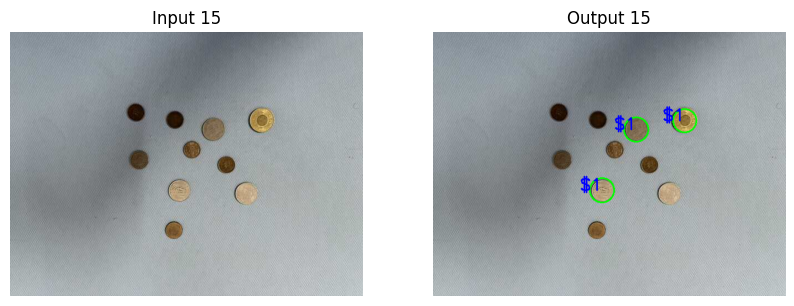

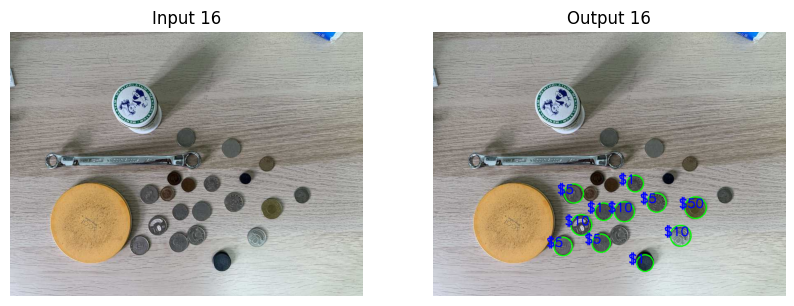

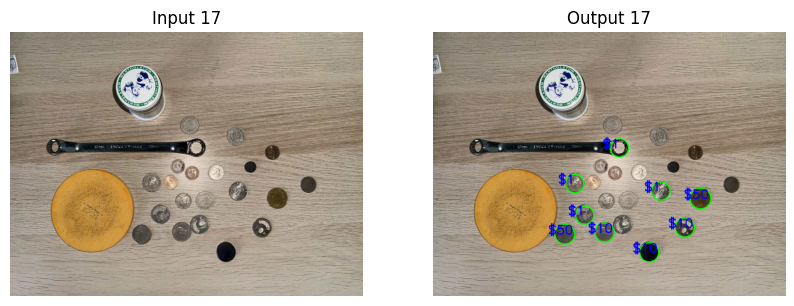

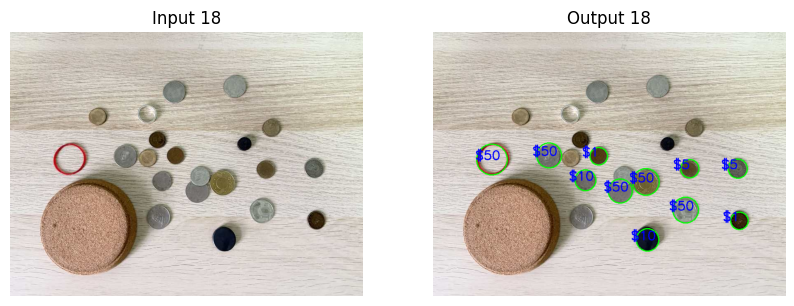

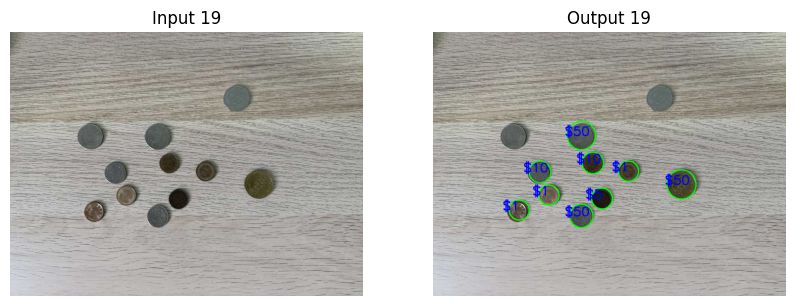

輸出檔案 /content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識/out.txt 已保存成功！


In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

# 定義輸入與輸出檔案
input_file = "/content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識/finaljpg_in20.txt"  # 輸入檔案名稱
image_folder = "/content/drive/MyDrive/photo"
output_file = "/content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識/out.txt"  # 輸出檔案名稱

# 初始化影像路徑列表
image_paths = []

# 讀取 in.txt，解析影像路徑，檢查檔案是否存在
with open(input_file, 'r') as file:
    for line in file:
        parts = line.strip()
        image_path = os.path.join(image_folder, parts)  # 將路徑與檔名結合
        if os.path.exists(image_path):
            image_paths.append(image_path)
        else:
            print(f"找不到對應檔案，準備忽略 {image_path}，已跳過。")

# 確認有效影像數量
num_images = len(image_paths)
print(f"有效影像數量: {num_images}")

# 初始化儲存結果
all_results = []
output_images = []

# 處理每張影像
for image_path in image_paths:
    in_image = cv2.imread(image_path)
    if in_image is None:
        print(f"錯誤：無法載入影像 {image_path}")
        continue

    # 轉換為灰階並應用高斯模糊 (降噪處理)
    gray_image = cv2.cvtColor(in_image, cv2.COLOR_BGR2GRAY)
    '''
    # 應用自適應直方圖均衡化 (CLAHE) 增強對比度
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_gray = clahe.apply(gray_image)

    # 調整亮度和對比度
    alpha = 1.5  # 對比度調整係數
    beta = 20    # 亮度調整值
    adjusted_gray = cv2.convertScaleAbs(enhanced_gray, alpha=alpha, beta=beta)
    '''

    # 應用高斯模糊 (降噪處理)
    blurred = cv2.GaussianBlur(gray_image, (9, 9), 2)

    # 使用霍夫圓檢測
    circles = cv2.HoughCircles(
        blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=35,
        param1=100, param2=30, minRadius=20, maxRadius=70
    )

    # 儲存結果的列表
    output = in_image.copy()
    coin_areas = []

    if circles is not None:
        circles = np.uint16(np.around(circles))
        radii = []
        for idx, i in enumerate(circles[0, :]):
            x, y, radius = i
            radii.append(radius)
            coin_area_data = {"x": x, "y": y, "radius": radius}
            coin_areas.append(coin_area_data)

        # 根據半徑排序並分四等分
        radii.sort()
        n = len(radii) // 4
        thresholds = [radii[n - 1], radii[2 * n - 1], radii[3 * n - 1]]

        # 計算最大四等分的平均值
        max_avg = sum(radii[3 * n:]) / len(radii[3 * n:])

        # 過濾掉超過 20% 的圓
        filtered_coin_areas = []
        for coin in coin_areas:
            if coin["radius"] <= max_avg * 1.2:
                filtered_coin_areas.append(coin)

        # 更新硬幣類型
        counts = [0, 0, 0, 0]  # 初始化硬幣計數 [1元, 5元, 10元, 50元]
        for idx, coin in enumerate(filtered_coin_areas):
            radius = coin["radius"]
            if radius <= thresholds[0]:
                coin["type"] = "1"
                counts[0] += 1
            elif radius <= thresholds[1]:
                coin["type"] = "5"
                counts[1] += 1
            elif radius <= thresholds[2]:
                coin["type"] = "10"
                counts[2] += 1
            else:
                coin["type"] = "50"
                counts[3] += 1

            # 在輸出影像上繪製並標記硬幣
            x, y = coin["x"], coin["y"]
            cv2.circle(output, (x, y), radius, (0, 255, 0), 2)  # 繪製綠色圓圈
            cv2.putText(output, f"${coin['type']}", (x - 40, y),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 0), 2)  # 標記硬幣編號與類型

        # 儲存結果
        all_results.append(counts)
        output_images.append(output)

# 將結果寫入 out.txt
with open(output_file, "w") as file:
    file.write(f"{num_images}\n")
    for result in all_results:
        file.write(" ".join(map(str, result)) + "\n")

# 列印結果供檢查
print("檢測結果預覽：")
for idx, result in enumerate(all_results):
    print(f"影像 {idx + 1}: 1元={result[0]}個, 5元={result[1]}個, 10元={result[2]}個, 50元={result[3]}個")

# 單獨展示輸入影像和辨識後的影像
for idx, (image_path, output_image) in enumerate(zip(image_paths, output_images)):
    # 顯示輸入影像
    input_image = cv2.imread(image_path)
    if input_image is not None:
        input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(input_image)
        plt.axis('off')
        plt.title(f"Input {idx + 1}")

    # 顯示辨識後影像
    output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 2, 2)
    plt.imshow(output_image)
    plt.axis('off')
    plt.title(f"Output {idx + 1}")

    plt.show()

# 檢查輸出檔案是否存在
if os.path.exists(output_file):
    print(f"輸出檔案 {output_file} 已保存成功！")
else:
    print(f"輸出檔案 {output_file} 保存失敗")
